<a href="https://colab.research.google.com/github/obeabi/Assignments/blob/master/A_B_Testing_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
## Case study on CTR for two advertisement campaigns
## Objective:  A-B Testing 
## Date: 2021-03-18

### Problem Description
In this blog, I would try my best to work through AB testing by examining the advertisment dataset which provides data on the result of two marketing campaigns (A & B) to establish if one campaign was more succesfully than the other based on the customer's action. The action is classified as either 0 or 1 where if: 

0  customer saw the advert and did not click
1 customer saw the advert and clicked



In [38]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, t
from statsmodels.stats.weightstats import ztest

print('libraries installed successfully!')

libraries installed successfully!


In [39]:
# Load dataset
df = pd.read_csv('advertisement_clicks.csv')
df.head()


,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [40]:
# Check for missing values
df.isna().sum()

advertisement_id    0
action              0
dtype: int64

In [41]:
# Group BY advertisment I_D and aggregrate by the mean
df.groupby(['advertisement_id']).mean()

,action
advertisement_id,
A,0.304
B,0.372


In [42]:
# We could also choose to group by the advertisment I_D but aggregrate by sum
df.groupby(['advertisement_id']).sum()

,action
advertisement_id,
A,304
B,372


We observe that both the mean and total number of clicks from advertisment B is larger than that from advertisment A. Thus one may be quick to infer that campaign B is more successfull than that of campaign A- I hope we all did not fall for this conclusion!

Other important factors that need to be consirdered before making a business decision include  the varaince and the number of samples taken. Specifically, is the sample size (n) a true reflection of my population (N)? These type of questions are addressed through A-B testing.

A-B testing is a statistical approach that provides us a strong basis of making a business decison (i.e. we a recomemnding A or B beacuse there is a statistical significance). Additionally, the strong basis implies we set a significance threshold (i.e. 1% or 5% depending on the business problem) that meet the business requirements.

For this use case, we have a 2-sample test (A vs. B) and we may want to perform a 1-sided test to establish if adverstiment id B is more successful that advertisment id A. Similarly, we maydecide to perform a 2-sided experiment to establish if the diffrence in the number of clicks for advertistment id A is statistically different from that of adverstisment id B.

It is important to note that performing a A-B testing provides us with a tool to either reject a null hypothesis (H0) or fail to reject our null hypothesis. You should never accept an alternative hypothesis (H1).We simply conclude that we don't have enough evidence to reject the null hypothesis.

Therefore to adress this problem we set our significance level  what is my null hypothesis (H0) and what is my alternative hypothesis (H1).



*   H0 : mean of A = mean of B
*   H1 : mean of A ~= mean of B (2-sided test)
*   H1 : mean of B > mean of A (1-sided test)
*   H1 : mean of B < mean of A (1-sided test)




In [43]:
# Obtain the different advertisement dataset
df_A = df[df.advertisement_id == "A"].reset_index(drop = True)
df_B = df[df.advertisement_id == "B"].reset_index(drop = True)

# Let's print the number of samples in A and B respectively
print("The number of samples for campaign A is :",df_A.shape[0])
print("The number of samples for campaign B is :",df_B.shape[0])

The number of samples for campaign A is : 1000
The number of samples for campaign B is : 1000


In [44]:
# Let's inspect dataframe for campaign A
df_A.head()

,advertisement_id,action
0,A,0
1,A,1
2,A,0
3,A,1
4,A,0


In [45]:
# Let's inspect dataframe for campaign B
df_B.head()

,advertisement_id,action
0,B,1
1,B,1
2,B,0
3,B,0
4,B,0


In [46]:
# Let's convert our dataframe to a numpy array since this would be our input to the scipy/statsmodel module
x_a = df_A.action.to_numpy()
x_b = df_B.action.to_numpy()

# Inpsect new data types

print(type(x_a))
print(type(x_b))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


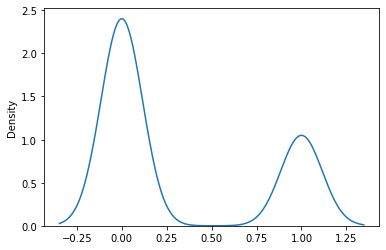

In [48]:
# Let's check if the datastet for campaign A and B are normally distributed
sns.kdeplot(x_a, label= 'Campaign A')
sns.kdeplot(x_b, label = 'Campaign B')
plt